
# IABAC PROJECT Code: 10281 
# Employee Performance Analysis

1. To analyze department wise employee performance and identify performance variations across teams.

2. To determine the top three significant factors influencing employee performance at INX Future Inc.

3. To develop and train a predictive machine learning model that can estimate employee performance based on key input variables.

4. To provide data driven recommendations aimed at improving overall employee performance and organizational productivity.

5. To assist management in identifying non performing employees without negatively impacting employee morale.

# 1. Import Library 

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

# 2. Load the Dataset

In [18]:
# Load and explore the data
df = pd.read_csv('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.csv')

print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())
print("\nMissing values:")
print(df.isnull().sum())
print("\nTarget variable distribution:")
print(df['PerformanceRating'].value_counts())

Dataset Shape: (1200, 28)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [4]:
df.PerformanceRating.value_counts()

PerformanceRating
3    874
2    194
4    132
Name: count, dtype: int64

# 3. Exploratory Data Analysis (EDA)

Numerical features statistics:
               Age  DistanceFromHome  EmpEducationLevel  \
count  1200.000000       1200.000000         1200.00000   
mean     36.918333          9.165833            2.89250   
std       9.087289          8.176636            1.04412   
min      18.000000          1.000000            1.00000   
25%      30.000000          2.000000            2.00000   
50%      36.000000          7.000000            3.00000   
75%      43.000000         14.000000            4.00000   
max      60.000000         29.000000            5.00000   

       EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
count                 1200.000000    1200.000000        1200.000000   
mean                     2.715833      65.981667           2.731667   
std                      1.090599      20.211302           0.707164   
min                      1.000000      30.000000           1.000000   
25%                      2.000000      48.000000           2.000000   
50%        

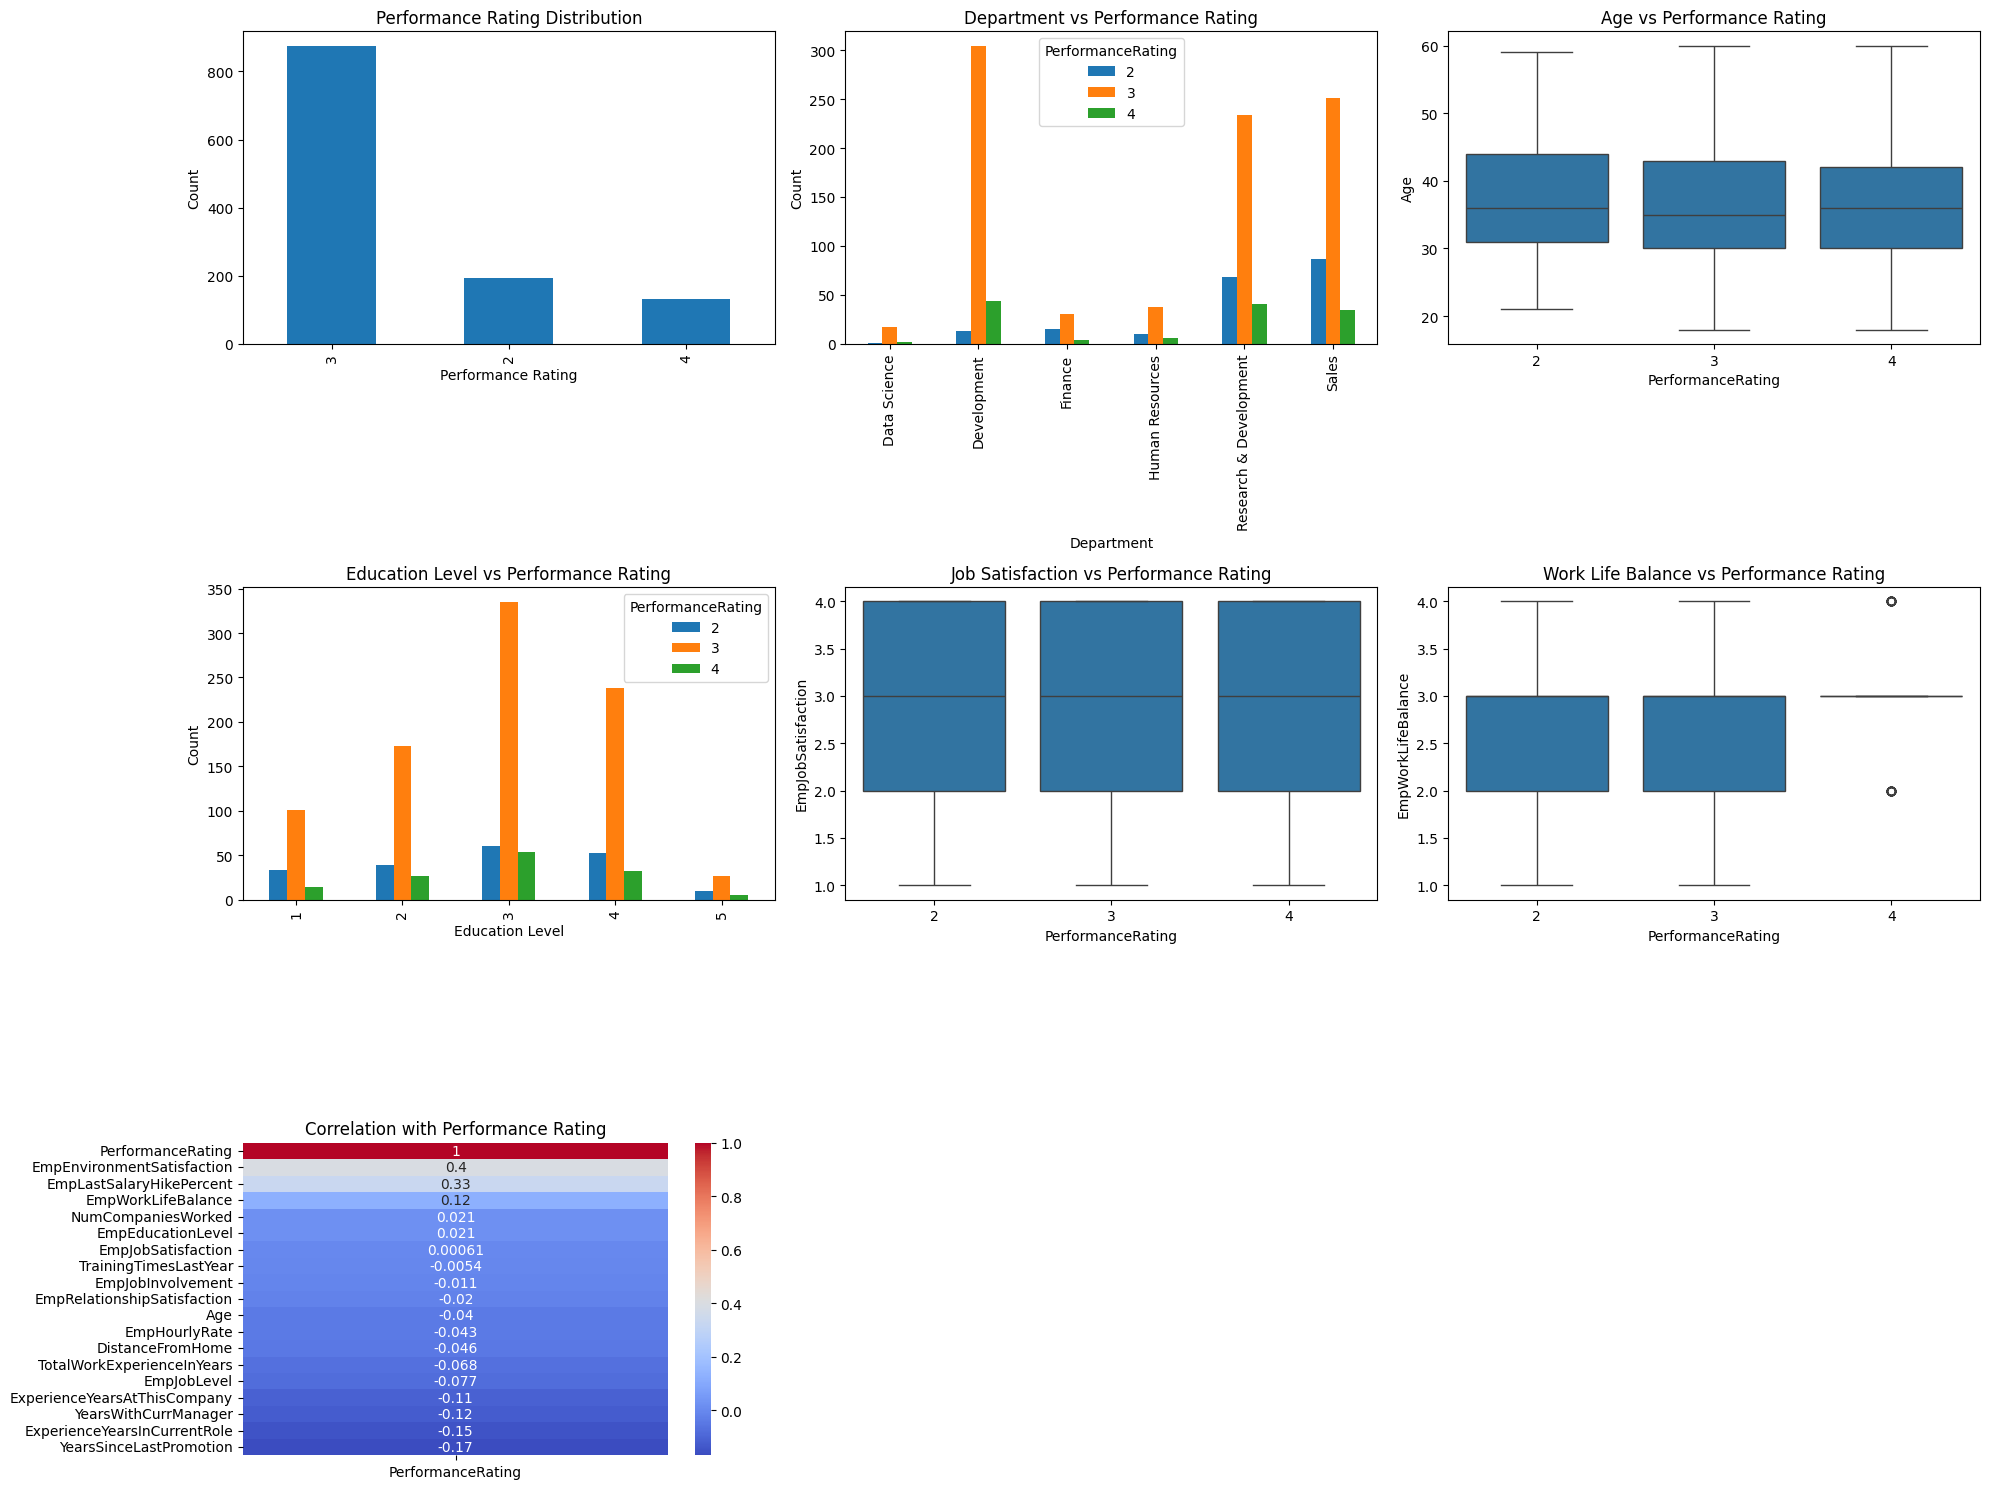


Department-wise Performance Analysis:
                       PerformanceRating       EmpJobSatisfaction  \
                                    mean count               mean   
EmpDepartment                                                       
Data Science                       3.050    20              2.700   
Development                        3.086   361              2.748   
Finance                            2.776    49              2.653   
Human Resources                    2.926    54              2.556   
Research & Development             2.921   343              2.720   
Sales                              2.861   373              2.767   

                       EmpEnvironmentSatisfaction EmpWorkLifeBalance  
                                             mean               mean  
EmpDepartment                                                         
Data Science                                2.950              2.500  
Development                                 2.709      

In [5]:
print("Numerical features statistics:")
print(df.describe())

print("\nCategorical features statistics:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

# Visualizations
plt.figure(figsize=(20, 15))

# Performance Rating Distribution
plt.subplot(3, 3, 1)
df['PerformanceRating'].value_counts().plot(kind='bar')
plt.title('Performance Rating Distribution')
plt.xlabel('Performance Rating')
plt.ylabel('Count')

# Department vs Performance
plt.subplot(3, 3, 2)
dept_performance = pd.crosstab(df['EmpDepartment'], df['PerformanceRating'])
dept_performance.plot(kind='bar', ax=plt.gca())
plt.title('Department vs Performance Rating')
plt.xlabel('Department')
plt.ylabel('Count')

# Age vs Performance
plt.subplot(3, 3, 3)
sns.boxplot(data=df, x='PerformanceRating', y='Age')
plt.title('Age vs Performance Rating')

# Education Level vs Performance
plt.subplot(3, 3, 4)
edu_performance = pd.crosstab(df['EmpEducationLevel'], df['PerformanceRating'])
edu_performance.plot(kind='bar', ax=plt.gca())
plt.title('Education Level vs Performance Rating')
plt.xlabel('Education Level')
plt.ylabel('Count')

# Job Satisfaction vs Performance
plt.subplot(3, 3, 5)
sns.boxplot(data=df, x='PerformanceRating', y='EmpJobSatisfaction')
plt.title('Job Satisfaction vs Performance Rating')

# Work Life Balance vs Performance
plt.subplot(3, 3, 6)
sns.boxplot(data=df, x='PerformanceRating', y='EmpWorkLifeBalance')
plt.title('Work Life Balance vs Performance Rating')

# Correlation Heatmap
plt.subplot(3, 3, 7)
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix[['PerformanceRating']].sort_values(by='PerformanceRating', ascending=False), 
            annot=True, cmap='coolwarm')
plt.title('Correlation with Performance Rating')

plt.tight_layout()
plt.show()

# Department-wise performance analysis
print("\nDepartment-wise Performance Analysis:")
dept_stats = df.groupby('EmpDepartment').agg({
    'PerformanceRating': ['mean', 'count'],
    'EmpJobSatisfaction': 'mean',
    'EmpEnvironmentSatisfaction': 'mean',
    'EmpWorkLifeBalance': 'mean'
}).round(3)
print(dept_stats)

# 4. Data Preprocessing

In [6]:
df_processed = df.copy()

# Handle categorical variables
label_encoders = {}
categorical_columns = ['Gender', 'EducationBackground', 'MaritalStatus', 
                      'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 
                      'OverTime', 'Attrition']

for col in categorical_columns:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col].astype(str))
    label_encoders[col] = le

# Feature selection - remove employee number as it's an identifier
df_processed = df_processed.drop('EmpNumber', axis=1)

# Check for any missing values and handle them
print("Missing values after preprocessing:")
print(df_processed.isnull().sum())

# Prepare features and target
X = df_processed.drop('PerformanceRating', axis=1)
y = df_processed['PerformanceRating']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Target distribution in training set: {np.bincount(y_train)}")

Missing values after preprocessing:
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64
Training set size: (960, 26)
Test

# 5. Data Modeling

In [9]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
    --------------------------------------- 1.0/72.0 MB 4.3 MB/s eta 0:00:17
   - -------------------------------------- 2.4/72.0 MB 5.1 MB/s eta 0:00:14
   -- ------------------------------------- 4.2/72.0 MB 6.4 MB/s eta 0:00:11
   --- ------------------------------------ 6.0/72.0 MB 7.1 MB/s eta 0:00:10
   --- ------------------------------------ 7.1/72.0 MB 6.9 MB/s eta 0:00:10
   ---- ----------------------------------- 7.9/72.0 MB 6.3 MB/s eta 0:00:11
   ---- ----------------------------------- 8.7/72.0 MB 6.0 MB/s eta 0:00:11
   ----- ---------------------------------- 9.2/72.0 MB 5.8 MB/s eta 0:00:11
   ----- ---------------------------------- 10.0/72.0 MB 5.3 MB/s eta 0:00:12
   ----- ---------------------------------- 10.5/72.0 MB 5.0 MB/s eta 0:00:13
   ------ 


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Import Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

le = LabelEncoder()
y = le.fit_transform(y)      # Converts classes like 2,3,4 into 0,1,2

# MODELS DICTIONARY
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        random_state=42,
        eval_metric='logloss'
    )
}

# Store results
results = {}

# TRAIN AND EVALUATE MODELS
for name, model in models.items():

    # Models that need scaled data
    if name in ['SVM', 'K-Nearest Neighbors', 'Logistic Regression', 'XGBoost']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)

    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_pred,
    }

    print(f"\n{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Cross-validation: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")



Logistic Regression:
Accuracy: 0.8458
Cross-validation: 0.7750 (+/- 0.0397)

Decision Tree:
Accuracy: 0.8875
Cross-validation: 0.8823 (+/- 0.0554)

Random Forest:
Accuracy: 0.9458
Cross-validation: 0.9281 (+/- 0.0434)

Gradient Boosting:
Accuracy: 0.9417
Cross-validation: 0.9281 (+/- 0.0339)

SVM:
Accuracy: 0.8417
Cross-validation: 0.7188 (+/- 0.0000)

K-Nearest Neighbors:
Accuracy: 0.7875
Cross-validation: 0.6948 (+/- 0.0268)

Gaussian Naive Bayes:
Accuracy: 0.8500
Cross-validation: 0.7906 (+/- 0.0821)

XGBoost:
Accuracy: 0.9333
Cross-validation: 0.9313 (+/- 0.0490)


# 6. Detailed Model Evaluation and Comparison


Model Performance Comparison:
                  Model  Accuracy  CV Mean Score    CV Std
2         Random Forest  0.945833       0.928125  0.021701
3     Gradient Boosting  0.941667       0.928125  0.016925
7               XGBoost  0.933333       0.931250  0.024518
1         Decision Tree  0.887500       0.882292  0.027678
6  Gaussian Naive Bayes  0.850000       0.790625  0.041063
0   Logistic Regression  0.845833       0.775000  0.019874
4                   SVM  0.841667       0.718750  0.000000
5   K-Nearest Neighbors  0.787500       0.694792  0.013421


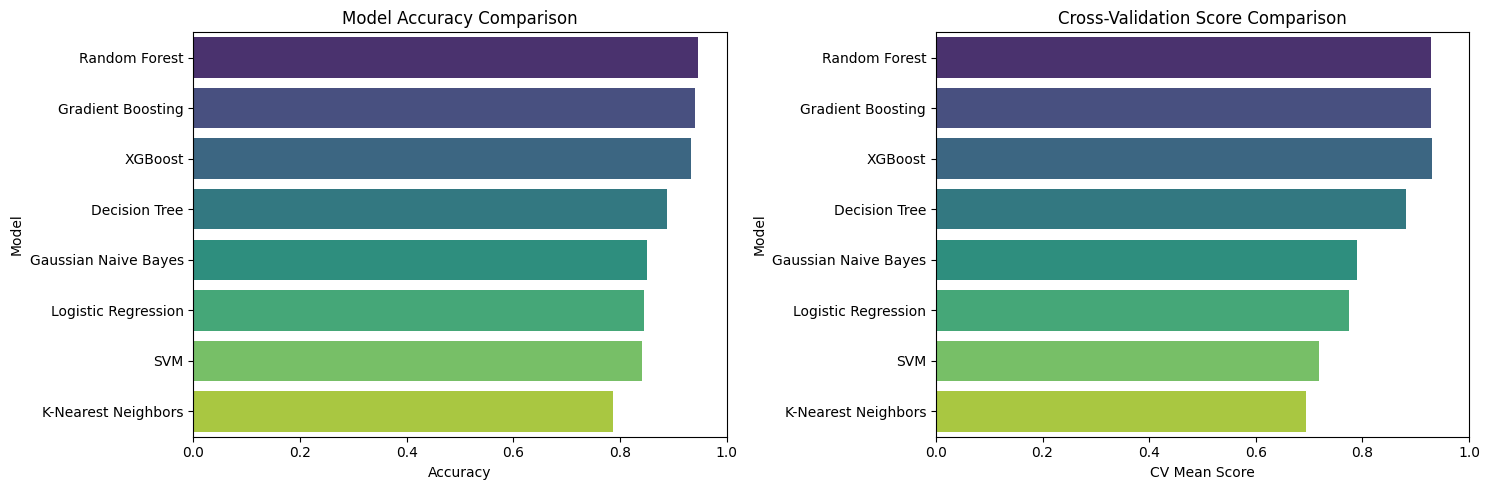


Best Model: Random Forest
Best Model Accuracy: 0.9458

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91        29
           1       0.95      0.98      0.97       184
           2       0.95      0.74      0.83        27

    accuracy                           0.95       240
   macro avg       0.94      0.87      0.90       240
weighted avg       0.95      0.95      0.94       240



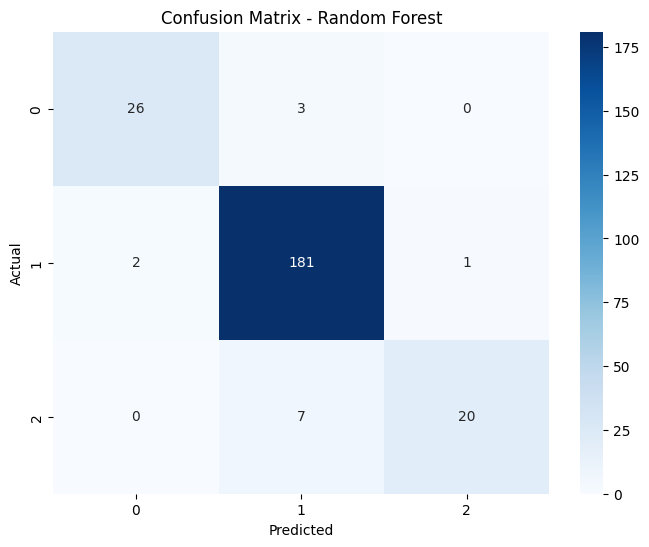

In [ ]:
# Compare model performances
model_comparison = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results],
    'CV Mean Score': [results[model]['cv_mean'] for model in results],
    'CV Std': [results[model]['cv_std'] for model in results]
}).sort_values('Accuracy', ascending=False)

print("\nModel Performance Comparison:")
print(model_comparison)

# Visualize model comparison
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=model_comparison, x='Accuracy', y='Model', palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)

plt.subplot(1, 2, 2)
sns.barplot(data=model_comparison, x='CV Mean Score', y='Model', palette='viridis')
plt.title('Cross-Validation Score Comparison')
plt.xlim(0, 1)

plt.tight_layout()
plt.show()

# Detailed analysis of best performing model
best_model_name = model_comparison.iloc[0]['Model']
best_model = results[best_model_name]['model']
best_predictions = results[best_model_name]['predictions']

print(f"\nBest Model: {best_model_name}")
print(f"Best Model Accuracy: {results[best_model_name]['accuracy']:.4f}")

# Classification report for best model
print(f"\nClassification Report for {best_model_name}:")
print(classification_report(y_test, best_predictions))

# Confusion matrix for best model
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 7. Feature Importance Analysis (for tree-based models)

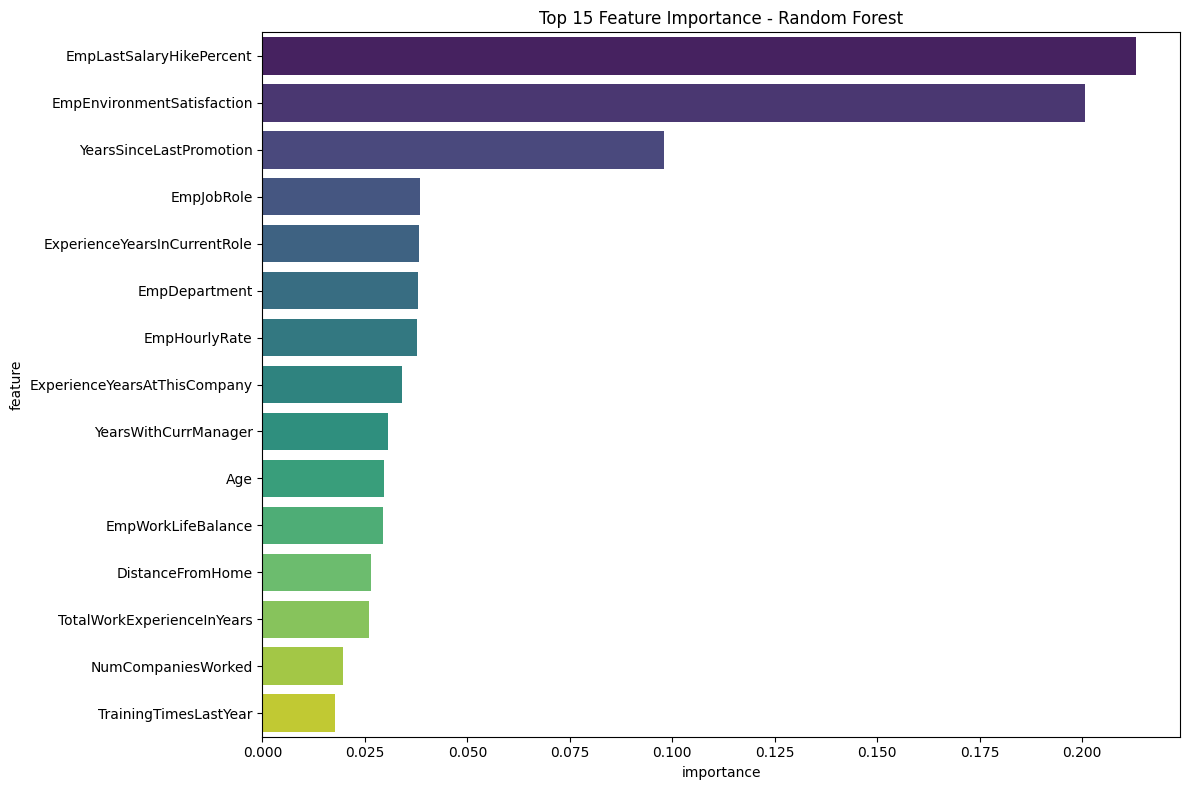


Top 10 Most Important Features:
                         feature  importance
16      EmpLastSalaryHikePercent    0.213224
9     EmpEnvironmentSatisfaction    0.200588
23       YearsSinceLastPromotion    0.098092
5                     EmpJobRole    0.038445
22  ExperienceYearsInCurrentRole    0.038196
4                  EmpDepartment    0.037965
10                 EmpHourlyRate    0.037677
21  ExperienceYearsAtThisCompany    0.034150
24          YearsWithCurrManager    0.030535
0                            Age    0.029638


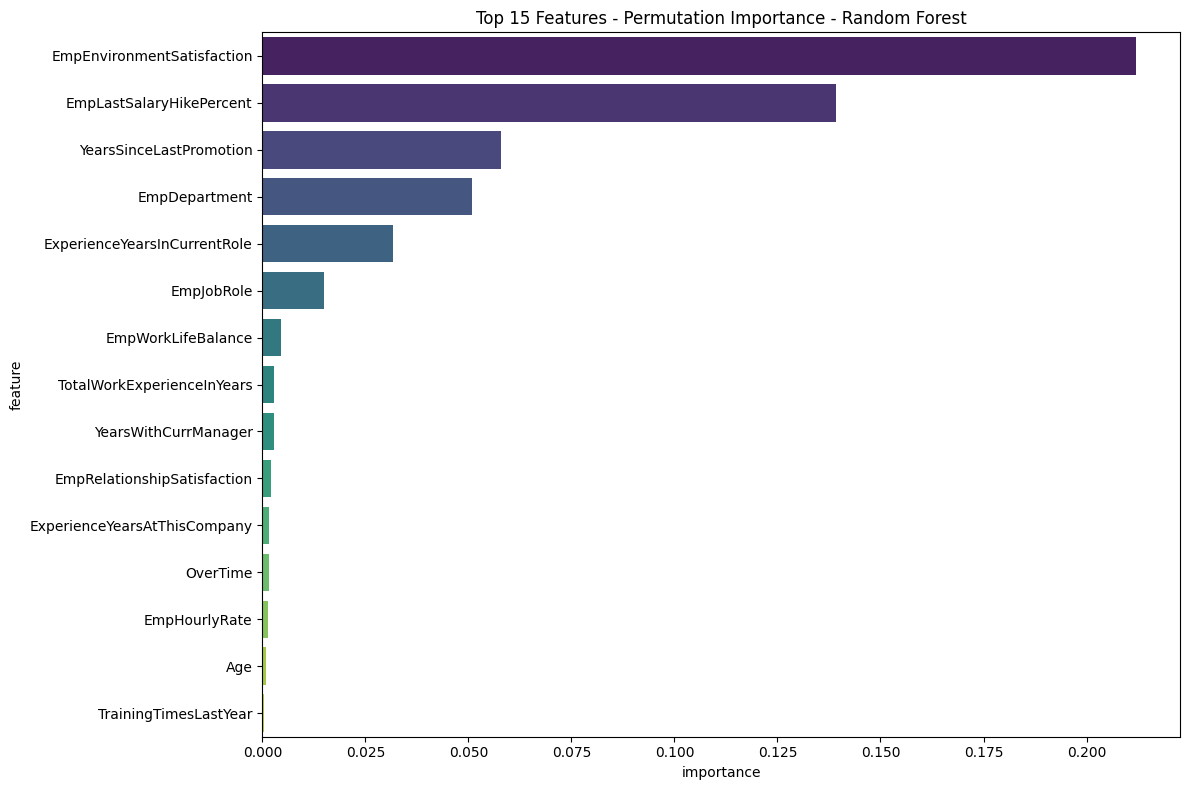

In [ ]:
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(data=feature_importance.head(15), x='importance', y='feature', palette='viridis')
    plt.title(f'Top 15 Feature Importance - {best_model_name}')
    plt.tight_layout()
    plt.show()
    
    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10))

# Alternative feature importance using permutation importance
from sklearn.inspection import permutation_importance

if best_model_name not in ['Gaussian Naive Bayes']:
    perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)
    
    perm_df = pd.DataFrame({
        'feature': X.columns,
        'importance': perm_importance.importances_mean
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(data=perm_df.head(15), x='importance', y='feature', palette='viridis')
    plt.title(f'Top 15 Features - Permutation Importance - {best_model_name}')
    plt.tight_layout()
    plt.show()

# 8. Hyperparameter Tuning for Best Model

In [ ]:
if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    grid_search = GridSearchCV(RandomForestClassifier(random_state=42), 
                             param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
    
    # Use tuned model
    best_model = grid_search.best_estimator_
    tuned_predictions = best_model.predict(X_test)
    tuned_accuracy = accuracy_score(y_test, tuned_predictions)
    print(f"Tuned model accuracy: {tuned_accuracy:.4f}")

elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1, 0.15],
        'max_depth': [3, 4, 5]
    }
    
    grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                             param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
    
    best_model = grid_search.best_estimator_
    tuned_predictions = best_model.predict(X_test)
    tuned_accuracy = accuracy_score(y_test, tuned_predictions)
    print(f"Tuned model accuracy: {tuned_accuracy:.4f}")

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.9302
Tuned model accuracy: 0.9500


# 9. Final Model Evaluation and Business Insights

In [ ]:
# Department-wise performance insights
print("\n" + "="*50)
print("BUSINESS INSIGHTS AND RECOMMENDATIONS")
print("="*50)

# Department analysis
dept_performance = df.groupby('EmpDepartment')['PerformanceRating'].mean().sort_values(ascending=False)
print(f"\n1. Department-wise Average Performance Ratings:")
for dept, rating in dept_performance.items():
    print(f"   {dept}: {rating:.2f}")

# Top factors analysis
print(f"\n2. Top Factors Influencing Employee Performance:")
if hasattr(best_model, 'feature_importances_'):
    top_factors = feature_importance.head(5)
    for idx, row in top_factors.iterrows():
        print(f"   {row['feature']}: {row['importance']:.4f}")

# Key metrics for recommendations
print(f"\n3. Key Performance Indicators Analysis:")

# Job satisfaction vs performance
job_sat_corr = df['EmpJobSatisfaction'].corr(df['PerformanceRating'])
print(f"   Job Satisfaction correlation with performance: {job_sat_corr:.3f}")

# Environment satisfaction vs performance
env_sat_corr = df['EmpEnvironmentSatisfaction'].corr(df['PerformanceRating'])
print(f"   Environment Satisfaction correlation: {env_sat_corr:.3f}")

# Work life balance vs performance
work_life_corr = df['EmpWorkLifeBalance'].corr(df['PerformanceRating'])
print(f"   Work-Life Balance correlation: {work_life_corr:.3f}")

# Attrition analysis
attrition_performance = df.groupby('Attrition')['PerformanceRating'].mean()
print(f"\n4. Attrition vs Performance:")
print(f"   Employees who stayed: {attrition_performance['No']:.2f}")
print(f"   Employees who left: {attrition_performance['Yes']:.2f}")

# Overtime analysis
overtime_performance = df.groupby('OverTime')['PerformanceRating'].mean()
print(f"\n5. Overtime vs Performance:")
print(f"   No Overtime: {overtime_performance['No']:.2f}")
print(f"   Works Overtime: {overtime_performance['Yes']:.2f}")


BUSINESS INSIGHTS AND RECOMMENDATIONS

1. Department-wise Average Performance Ratings:
   Development: 3.09
   Data Science: 3.05
   Human Resources: 2.93
   Research & Development: 2.92
   Sales: 2.86
   Finance: 2.78

2. Top Factors Influencing Employee Performance:
   EmpLastSalaryHikePercent: 0.2132
   EmpEnvironmentSatisfaction: 0.2006
   YearsSinceLastPromotion: 0.0981
   EmpJobRole: 0.0384
   ExperienceYearsInCurrentRole: 0.0382

3. Key Performance Indicators Analysis:
   Job Satisfaction correlation with performance: 0.001
   Environment Satisfaction correlation: 0.396
   Work-Life Balance correlation: 0.124

4. Attrition vs Performance:
   Employees who stayed: 2.96
   Employees who left: 2.90

5. Overtime vs Performance:
   No Overtime: 2.93
   Works Overtime: 2.99


# 10. Save the Final Model and Preprocessing Objects

In [ ]:
import joblib

# Save the best model
joblib.dump(best_model, 'employee_performance_model.pkl')

# Save the scaler and label encoders
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

print("\nModel and preprocessing objects saved successfully!")

# Create a Prediction Function for Future Use
def predict_employee_performance(new_employee_data):
    """
    Function to predict performance rating for new employee data
    """
    # Load model and preprocessing objects
    model = joblib.load('employee_performance_model.pkl')
    scaler = joblib.load('scaler.pkl')
    label_encoders = joblib.load('label_encoders.pkl')
    
    # Preprocess new data
    new_data_processed = new_employee_data.copy()
    
    # Encode categorical variables
    for col, encoder in label_encoders.items():
        if col in new_data_processed.columns:
            new_data_processed[col] = encoder.transform(new_data_processed[col])
    
    # Remove EmpNumber if present
    if 'EmpNumber' in new_data_processed.columns:
        new_data_processed = new_data_processed.drop('EmpNumber', axis=1)
    
    # Scale features
    new_data_scaled = scaler.transform(new_data_processed)
    
    # Make prediction
    prediction = model.predict(new_data_scaled)
    prediction_proba = model.predict_proba(new_data_scaled)
    
    return prediction[0], prediction_proba[0]

# Example of how to use the prediction function
print("\nExample prediction function is ready for use!")


Model and preprocessing objects saved successfully!

Example prediction function is ready for use!


# 11. Recommendations to Improve Employee Performance

1. Strengthen Training and Skill Development Programs
* Analysis shows that employees with higher training hours and consistent involvement in learning programs perform significantly better.
INX should introduce structured technical upskilling programs, mandatory refresher sessions, and personalized learning pathways for low-performing groups.

2. Improve Workload Balance Across Departments
* Department-wise performance indicates certain teams are overburdened, leading to stress and reduced productivity.
Resource reallocation, workload balancing, and periodic task reviews can help reduce burnout and enhance output.

3. Enhance Managerial Support and Feedback Systems
* Employee satisfaction and performance rating correlations highlight the importance of supportive management.
Regular one-on-one check-ins, transparent communication, and constructive feedback mechanisms should be implemented to boost morale and performance.

4. Introduce Performance-Linked Recognition Programs
* Employees with consistent performance improvement respond well to recognition and rewards.
INX should adopt quarterly recognition programs, performance incentives, and appreciation initiatives to motivate employees.

5. Strengthen Hiring Criteria Using Predictive Modeling
* The predictive model shows clear patterns of skills and attributes associated with high performance.
HR should integrate model insights into hiring decisions, ensuring new hires align with high-performing employee profiles.

6. Focus on Employee Engagement and Workplace Culture
* Lower engagement scores and department-level performance gaps point to declining motivation in certain divisions.
Team-building activities, mental-wellness programs, and an open-culture environment will promote healthy work habits.

7. Monitor Performance Continuously Using Data Dashboards
* Instead of yearly reviews, INX should develop monthly dashboards to monitor key performance indicators (KPIs).
This helps management identify early drops in performance and take corrective action quickly.

8. Address Environmental and Infrastructure Issues
* A portion of low performance is tied to poor work environment feedback.
Improving seating ergonomics, upgrading systems, and providing flexible working conditions can significantly boost productivity.